In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# reading the file
df = pd.read_csv(r"Updated.csv")
df.head()

,label,sub_mssg
0,0,job post - apple - research center content - l...
1,0,query : letter for text identification I be po...
2,0,risk a colleague and I be the of risk by our h...
3,0,request book information this morning I be on ...
4,0,call for : in syntactic theory content - lengt...


In [4]:
# printing the shape of the dataframe
df.shape

(4196, 2)

In [5]:
# storing the sub and message clumn in a variable named corpus
corpus = df['sub_mssg'].values.astype('U')

In [6]:
# definning the count vectorizer
vectorizer = CountVectorizer()
# fitting the corpus and transforming it to vector
X = vectorizer.fit_transform(corpus)

In [7]:
# Corpus after count vectorizer
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
# getting the shape of the count vectorizer
l = X.toarray()
l.shape

(4196, 28969)

In [9]:
# now definning the Tf Idf vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus)


In [10]:
type(X)

scipy.sparse._csr.csr_matrix

In [11]:
# getting the feature names
vectorizer.get_feature_names()[144]

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [12]:
X = X.toarray()

In [13]:
type(X)

numpy.ndarray

In [14]:
# getting the shape of the output
X.shape

(4196, 5000)

In [15]:
X.dtype

dtype('float64')

In [16]:
temp = df['label'].array
temp

<NumpyExtensionArray>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 ...
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 4196, dtype: int64

In [17]:
temp = np.array(temp)
temp

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
temp.shape

(4196,)

In [19]:
temp = np.reshape(temp,(4196,1))

In [20]:
temp.shape

(4196, 1)

In [21]:
temp

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [22]:
temp = np.hstack([X,temp])

In [23]:
temp.shape

(4196, 5001)

In [24]:
temp = temp.transpose()
temp.shape

(5001, 4196)

In [25]:
# now coverting the output of tf idf to a csv file
np.savetxt('Tf Idf for cpp.csv',temp,delimiter=',')


# y = df['label'].array
# y = np.array(y)
# y.shape


# y = y.reshape((1,4196))
# y.shape

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(X, df['label'].array, test_size=0.3, random_state=5)


x_train.shape

(2937, 5000)

In [27]:
x_test.shape

(1259, 5000)

**Naive Bayes classifier**

In [28]:
# #converting sparse matrix to matrix
# x_train = x_train.A
# x_test = x_test.A

model = MultinomialNB().fit(x_train,y_train)


y_pred = model.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [29]:
lAcc = []
lModel = []


acc_NB = accuracy_score(y_test,y_pred)
lAcc.append(acc_NB)
lModel.append("Naive Bayes")
acc_NB

0.9864972200158856

**MLP**

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
model =MLPClassifier(solver='adam',max_iter=300)
model.fit(x_train,y_train)

MLPClassifier(max_iter=300)

In [32]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [33]:
MLPacc = accuracy_score(y_test,y_pred)
lAcc.append(MLPacc)
lModel.append("MLP classifier")
MLPacc

0.9912629070691025

**SVM**

In [34]:
from sklearn import svm

In [35]:
model = svm.SVC()
model.fit(x_train,y_train)

SVC()

In [36]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [37]:
SVMacc = accuracy_score(y_test,y_pred)
lAcc.append(SVMacc)
lModel.append("SVM")
SVMacc

0.9904686258935663

**Random forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [41]:
RFacc = accuracy_score(y_test,y_pred)
lAcc.append(RFacc)
lModel.append("Random Forest Classifier")
RFacc

0.9809372517871326

**Data visualization**

In [42]:
import matplotlib.pyplot as plt

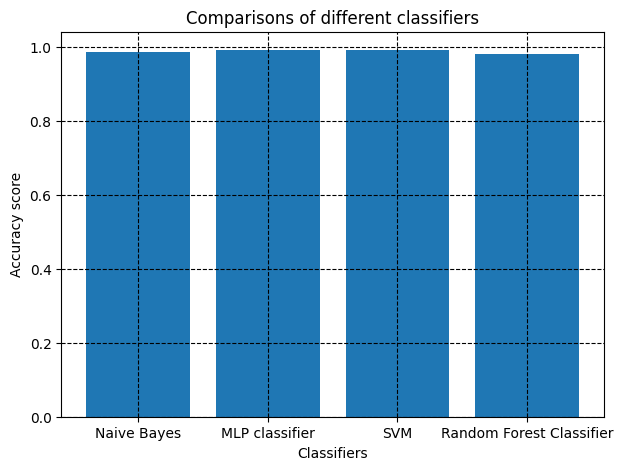

In [43]:
plt.figure(figsize=(7,5))
plt.bar(lModel,lAcc)
plt.grid(linestyle='--',color='black')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy score")
plt.title("Comparisons of different classifiers")
plt.show()